In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
OUT_FILE_LIST = ['out_worker_1', 'out_worker_2', 'out_worker_4', 'out_worker_8']
out_interval_TF = [0, 1, 2, 4, 8, 16]
speed_up_TF = [0, 1, 1.47, 1.58, 0.729, 0.3614]

def fetch_time(file_dir):
	with open(file_dir, "rb") as file:
		# use to counter num of workers
		worker_counter = 0
		time_list = []
		tmp_time = []
		for line in file.readlines():
			tmp_line_content = line.rstrip('\n').split(',')
			if tmp_line_content[0][0:6] == "Worker":
				worker_counter+=1
				tmp_time.append(float(tmp_line_content[-1].split(':')[-1]))
			elif tmp_line_content[0][0:6] != "Worker" and worker_counter != 0:
				time_list.append(max(tmp_time))
				worker_counter=0
				tmp_time = []
	return time_list

def avg_list(list):
	return float(sum(list)) / len(list)

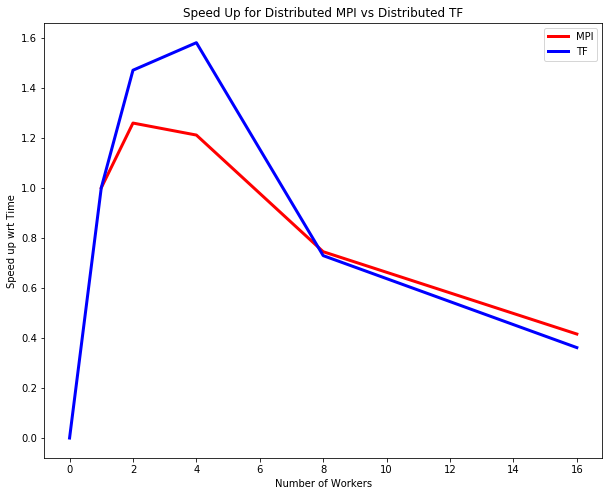

In [4]:
speed_up_list_tmp = []
for out_file in OUT_FILE_LIST:
	time_list=fetch_time(out_file)
	speed_up_list_tmp.append(avg_list(time_list))
speed_up_list_tmp.append(25.70)
speed_up_list = [speed_up_list_tmp[0]/i for i in speed_up_list_tmp]
worker_num_interval = [1, 2, 4, 8, 16]
fig = plt.figure(1)
plt.plot(worker_num_interval, speed_up_list, '-r', linewidth=3.0, label='MPI')
plt.plot(out_interval_TF, speed_up_TF, 'b', linewidth=3.0, label='TF')
plt.xlabel("Number of Workers")
plt.ylabel("Speed up wrt Time")
plt.title("Speed Up for Distributed MPI vs Distributed TF")
plt.legend()
plt.show()